In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import japanize_matplotlib


Best Hyperparameters: {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 50}
Best score: -0.00
Mean Absolute Error: 0.00
Mean Squared Error: 0.00
Root Mean Squared Error: 0.01
R-squared: 0.52


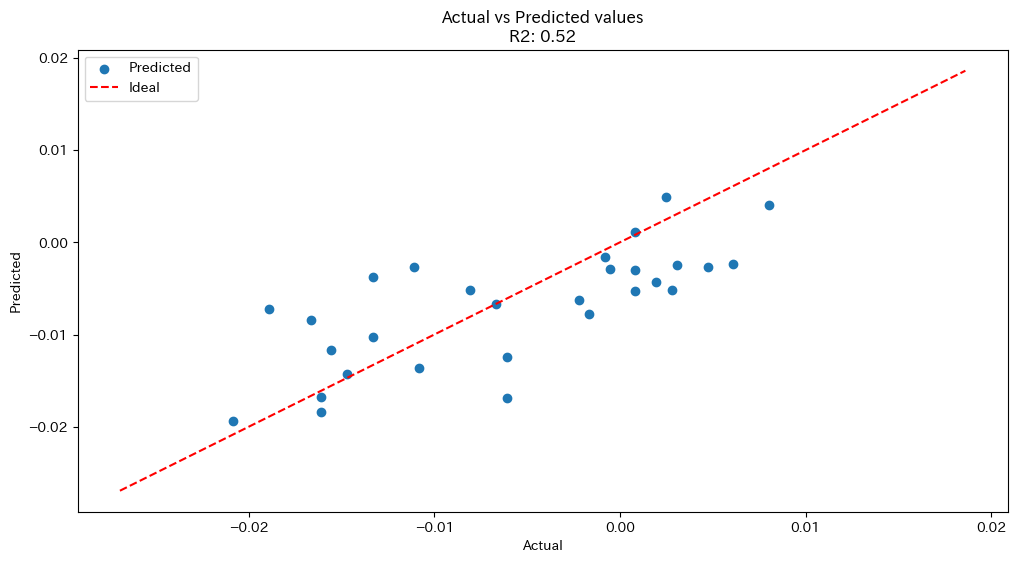

In [10]:
# CSVファイルを読み込む
d = pd.read_csv(r"C:\Users\00220401626\Desktop\必要なファイル\s.csv", encoding='cp932')
d.drop(['Z_mean', 'C_min', 'C_mean', 'spin_max','judge'],axis=1,inplace=True)

# soukansun2_034なし2.csv

# 特徴量とターゲット変数を分ける
X = d.drop('Angl_gosa', axis=1)
y = d['Angl_gosa']

# データを訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 前処理とモデルのパイプラインを定義する
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# チューニングするパラメータを定義する
params = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [5, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# 交差検証の設定を定義する
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# グリッドサーチを実行する
grid_search = GridSearchCV(pipeline, param_grid=params, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 最適なモデルとパラメータを表示する
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_:.2f}")

# テストデータでの予測結果を表示する
y_pred = grid_search.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

# 実際の値と予測値をプロットする
plt.figure(figsize=(12, 6))
plt.title('Actual vs Predicted values'+ '\nR2: {:.2f}'.format(r2))
plt.scatter(y_test, y_pred, label='Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='r', label='Ideal')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()


In [11]:
d = pd.read_csv(r"C:\Users\00220401626\Desktop\必要なファイル\s.csv", encoding='cp932')
d.corrwith(d['adjustment']).abs().sort_values(ascending=False)

C:\Users\00220401626\AppData\Local\Temp\ipykernel_11832\4215913212.py:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d.corrwith(d['adjustment']).abs().sort_values(ascending=False)


adjustment    1.000000
X_mean        0.637793
Angl_gosa     0.510110
B_mean        0.507768
C_max         0.427851
B_max         0.388369
B_min         0.261878
Z_min         0.227637
X_min         0.183548
Z_max         0.143818
C_mean        0.123868
diam_gosa     0.115871
Z_mean        0.099034
spin_min      0.082597
spin_mean     0.066544
C_min         0.056905
X_max         0.045378
spin_max           NaN
dtype: float64

In [ ]:
d.columns